In [1]:
import datetime
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm 
from uuid import uuid4
    
from IPython.display import HTML
def View(df):
    css = """<style>
    table { border-collapse: collapse; border: 3px solid #eee; }
    table tr th:first-child { background-color: #eeeeee; color: #333; font-weight: bold }
    table thead th { background-color: #eee; color: #000; }
    tr, th, td { border: 1px solid #ccc; border-width: 1px 0 0 1px; border-collapse: collapse;
    padding: 3px; font-family: monospace; font-size: 10px }</style>
    """
    s  = '<script type="text/Javascript">'
    s += 'var win = window.open("", "Title", "toolbar=no, location=no, directories=no, status=no, menubar=no, scrollbars=yes, resizable=yes, width=780, height=200, top="+(screen.height-400)+", left="+(screen.width-840));'
    s += 'win.document.body.innerHTML = \'' + (df.to_html() + css).replace("\n",'\\') + '\';'
    s += '</script>'
    return(HTML(s+css))    

os.chdir(r'C:\Users\User\GitHub\WebET_Analysis')
print("Current Working directory " , os.getcwd())

Current Working directory  C:\Users\User\GitHub\WebET_Analysis


# Read data

In [2]:
data_et = pd.read_csv(r'C:/Users/User/GitHub/WebET_Analysis/data_jupyter/data_et_cleaned.csv')
data_trial = pd.read_csv(r'C:/Users/User/GitHub/WebET_Analysis/data_jupyter/data_trial_cleaned.csv')
data_subject = pd.read_csv(r'C:/Users/User/GitHub/WebET_Analysis/data_jupyter/data_subject_cleaned.csv')

print(pd.DataFrame([[len(data_et)], [len(data_trial)], [len(data_subject)]], 
                   columns=['length'],
                   index=['data_et', 'data_trial', 'data_subject'])
     )

               length
data_et       2479351
data_trial     113289
data_subject      212


In [16]:
print(pd.DataFrame(
    [
        [len(data_et['run_id'].unique())], 
        [len(data_trial['run_id'].unique())], 
        [len(data_subject['run_id'].unique())]
    ], 
        columns=['Number of unique subjects'],
        index=['data_et', 'data_trial', 'data_subject'])
     )

subjects_et_vs_trial = np.setdiff1d(
    data_et['run_id'].unique(),
    data_trial['run_id'].unique()
)

subjects_trial_vs_subjects = np.setdiff1d(
    data_et['run_id'].unique(),
    data_subject['run_id'].unique()
)

print(
    f"""Number of different subjects: \n"""
    f"""subjects_et_vs_trial: {len(subjects_et_vs_trial)} \n"""
    f"""subjects_trial_vs_subjects: {len(subjects_trial_vs_subjects)}"""
)

              Number of unique subjects
data_et                             212
data_trial                          212
data_subject                        212
Number of different subjects: 
subjects_et_vs_trial: 0 
subjects_trial_vs_subjects: 0


# Categorical variables
Note: Columns 'vertical position' a is supposed to be the best one

In [17]:
for col in ['Current Country of Residence', 'Nationality', 'employment_status', 'webcam_fps', 'ethnic', 'gender']:
    print(pd.crosstab(index=data_subject[col],
                      columns="count")
         )
    print('\n')

col_0                         count
Current Country of Residence       
Chile                             1
Greece                            3
Hungary                           1
Israel                            2
Italy                             2
Mexico                            2
Poland                           10
Portugal                          2
South Africa                      1
Spain                             2
United Kingdom                    9
United States                   172


col_0               count
Nationality              
Bangladesh              2
Cambodia                1
Canada                  1
Chile                   1
China                   1
Croatia                 1
Greece                  3
Hungary                 1
India                   4
Israel                  2
Italy                   7
Jamaica                 1
Korea                   2
Mexico                  4
Nepal                   1
Netherlands             1
Peru                    1


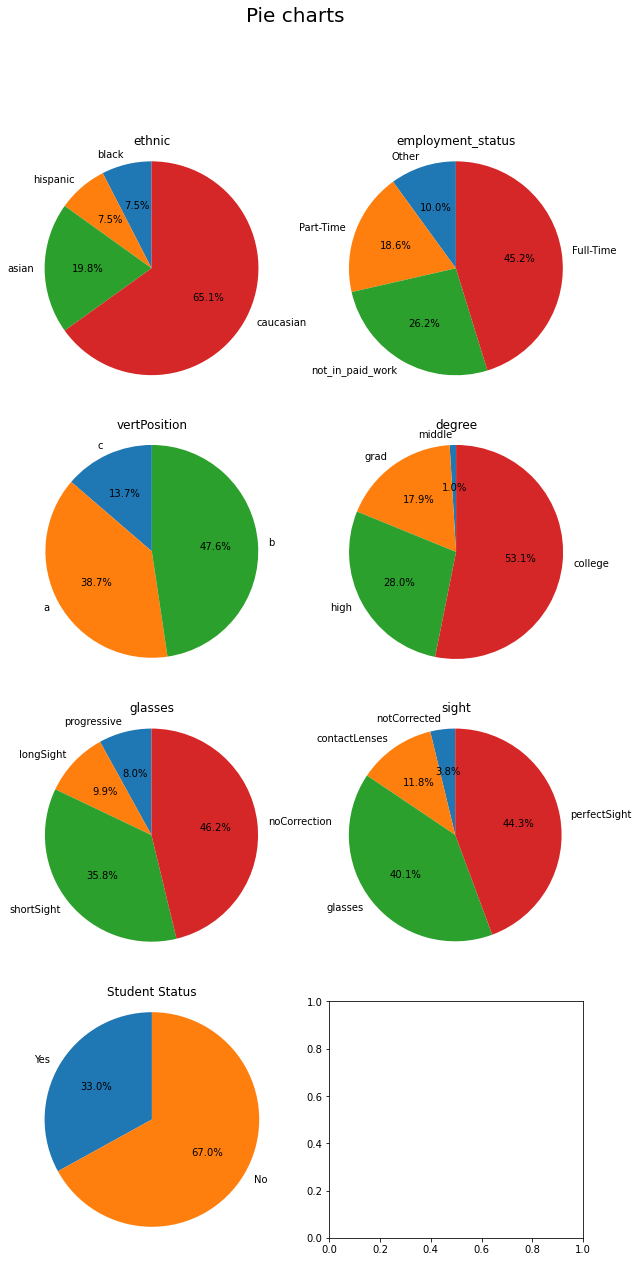

In [58]:
def cross_tab(col):
    pie = pd.crosstab(
        index=data_subject[col],
        columns="count") \
        .reset_index() \
        .sort_values(by='count')
    pie.columns=[col, 'count']
    return pie

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(10, 20))
fig.suptitle('Pie charts', fontsize=20)
ax = ax.ravel()

predictors = [
    'ethnic', 'employment_status', 'vertPosition', 'degree', 
    'glasses', 'sight', 'Student Status'
]
for i in range(0, len(predictors)):
    pie = cross_tab(predictors[i])
    ax[i].pie(pie['count'], labels=pie[predictors[i]], autopct='%1.1f%%', startangle=90)
    ax[i].axis('equal')
    ax[i].set_title(predictors[i])

# Age

(array([ 1.,  3.,  1.,  4.,  6.,  1., 10.,  7.,  9., 17., 18., 21., 24.,
        34., 48.]),
 array([1946.        , 1949.66666667, 1953.33333333, 1957.        ,
        1960.66666667, 1964.33333333, 1968.        , 1971.66666667,
        1975.33333333, 1979.        , 1982.66666667, 1986.33333333,
        1990.        , 1993.66666667, 1997.33333333, 2001.        ]),
 <BarContainer object of 15 artists>)

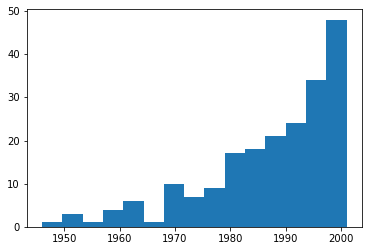

In [60]:
plt.hist(data_subject['birthyear'], bins=15)